# Watershed Algorithm

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Step 1: Read Image

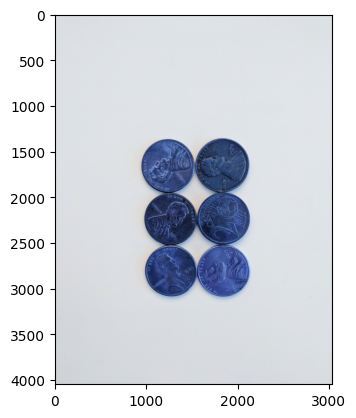

In [2]:
bgr_img = cv2.imread("../DATA/pennies.jpg")
plt.imshow(bgr_img)

### Step 2: Convert to Grayscale

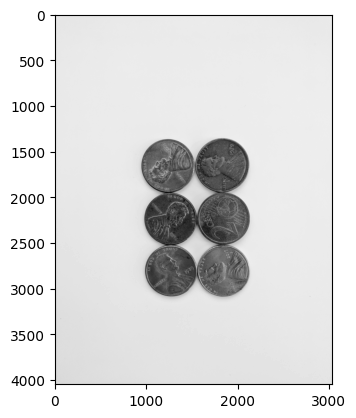

In [3]:
gray_img = cv2.cvtColor(bgr_img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap="gray")

### Step 3: Apply Blur

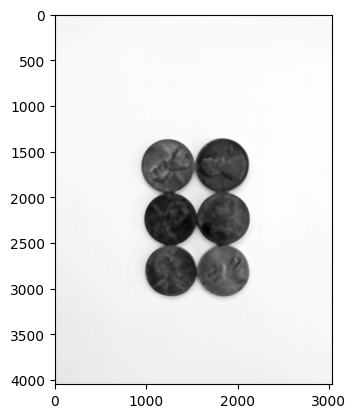

In [4]:
blurred_img = cv2.medianBlur(gray_img, 35)
plt.imshow(blurred_img, cmap="gray")

### Step 4: Apply Threshold

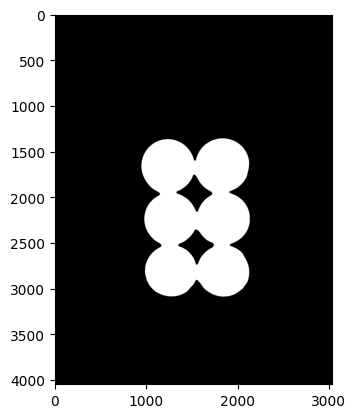

In [5]:
ret, thresh = cv2.threshold(blurred_img, 160, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap="gray")

### Optional Step: Remove Noise

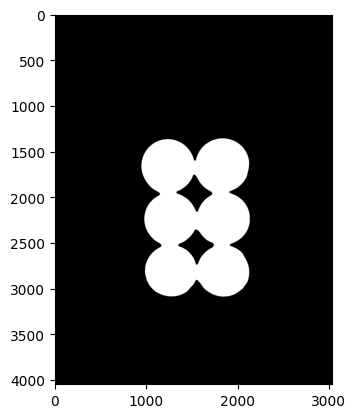

In [6]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
plt.imshow(opening, cmap="gray")

### Step 5: Find Sure Background

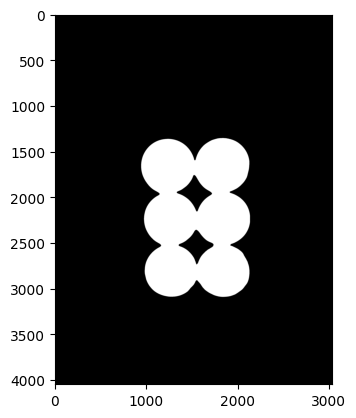

In [7]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)
plt.imshow(sure_bg, cmap="gray")

### Step 6: Find Sure Foreground

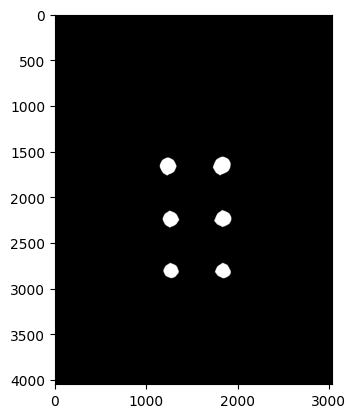

In [8]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
plt.imshow(sure_fg, cmap="gray")

### Step 7: Find Unknown Region

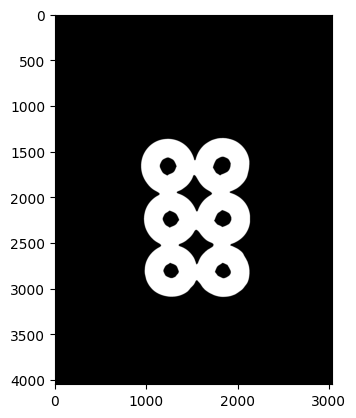

In [9]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown, cmap="gray")

### Step 8: Label Markers of Sure Foreground

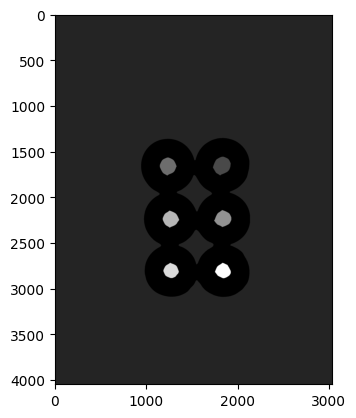

In [10]:
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1
markers[unknown==255] = 0

plt.imshow(markers, cmap="gray")

### Step 9: Apply Watershed Algorithm to Find Markers

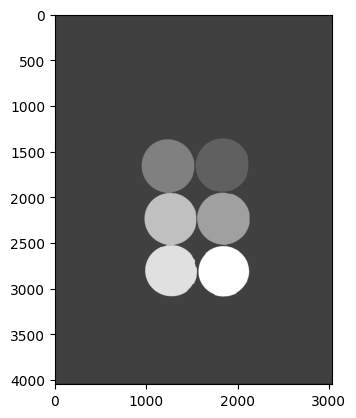

In [11]:
markers = cv2.watershed(bgr_img,markers)
plt.imshow(markers, cmap="gray")

### Step 10: Find Contours on Markers

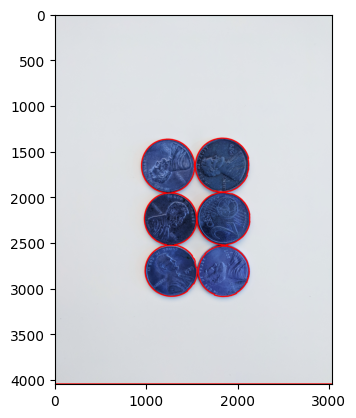

In [12]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(bgr_img, contours, i, (255, 0, 0), 10)

plt.imshow(bgr_img)